# POST TEST 5 SUPERVISED LEARNING
## 2109106036 - Ekleccia R

In [1]:
# IMPORT LIBRARY yang akan digunakan
import pandas as pd
import seaborn as sns

In [2]:
df = pd.read_csv("DataHepatitis.csv")

In [3]:
df.head()

,ID,Age,Sex,GGT,CREA,ALB,BIL,ALT,AST,PROT,ALP,CHOL,CHE,Category
0,0,32,m,12.1,106.0,38.5,7.5,7.7,22.1,69.0,52.5,3.23,6.93,0=Blood Donor
1,1,32,m,15.6,74.0,38.5,3.9,18.0,24.7,76.5,70.3,4.80,11.17,0=Blood Donor
2,2,32,m,33.2,86.0,46.9,6.1,36.2,52.6,79.3,74.7,5.20,8.84,0=Blood Donor
3,3,32,m,33.8,80.0,43.2,18.9,30.6,22.6,75.7,52.0,4.74,7.33,0=Blood Donor
4,4,32,m,29.9,76.0,39.2,9.6,32.6,24.8,68.7,74.1,4.32,9.15,0=Blood Donor


#### Menentukan kolom yang akan menjadi patokan nilai 

In [4]:
df['Category'].unique()

array(['0=Blood Donor', '0s=suspect Blood Donor', '1=Hepatitis',
       '2=Fibrosis', '3=Cirrhosis'], dtype=object)

# Data Splitting


In [5]:
X = df[['GGT', 'CREA','ALB', 'BIL', 'ALT', 'AST', 'PROT', 'ALP', 'CHOL', 'CHE']]
Y = df['Category']

In [6]:
from sklearn.model_selection import train_test_split

#### Test Size 20% dari dataset, random state=0 agar data yang diambil tidak diambil secara acak

In [7]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.2, random_state=0)

# Algoritma untuk membandingkan score/hasil terbaiknya.

## 1. Algoritma K-Nearest Neighbor

In [8]:
# Import Library KNN
from sklearn.neighbors import KNeighborsClassifier

In [9]:
modelKNN = KNeighborsClassifier(n_neighbors = 5)

In [10]:
modelKNN.fit(X_train, Y_train)

KNeighborsClassifier()

In [11]:
print(f'Akurasi Training menggunakan KNN : {modelKNN.score(X_train, Y_train)}')
print(f'Akurasi Test menggunakan KNN : {modelKNN.score(X_test, Y_test)}')

Akurasi Training menggunakan KNN : 0.9468085106382979
Akurasi Test menggunakan KNN : 0.9152542372881356


#### Melakukan Prediksi terhadap suatu data

In [12]:
data = [[12.1, 106.0 , 38.5 , 7.5 , 7.7 , 22.1 , 69.0 , 52.5 , 3.23 , 6.93]]
test_prediksi = [[23.3, 77.0 , 58.5 , 8.5 , 5.7 , 21.3 , 70 , 42.6 , 3.21 , 7.55]]
modelKNN.predict(test_prediksi)

C:\Users\ASUS\AppData\Roaming\Python\Python310\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


array(['0=Blood Donor'], dtype=object)

## 2. Algoritma Decision TREE

In [13]:
# Import Library yang akan digunakan pada Decision Tree
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
import matplotlib.pyplot as plt

In [14]:
DT = DecisionTreeClassifier().fit(X_train, Y_train)

In [15]:
print(f'Akurasi Training menggunakan Decision Tree : {DT.score(X_train, Y_train)}')
print(f'Akurasi Test menggunakan Decision Tree : {DT.score(X_test, Y_test)}')

Akurasi Training menggunakan Decision Tree : 1.0
Akurasi Test menggunakan Decision Tree : 0.9067796610169492


#### Diagram Decision Tree

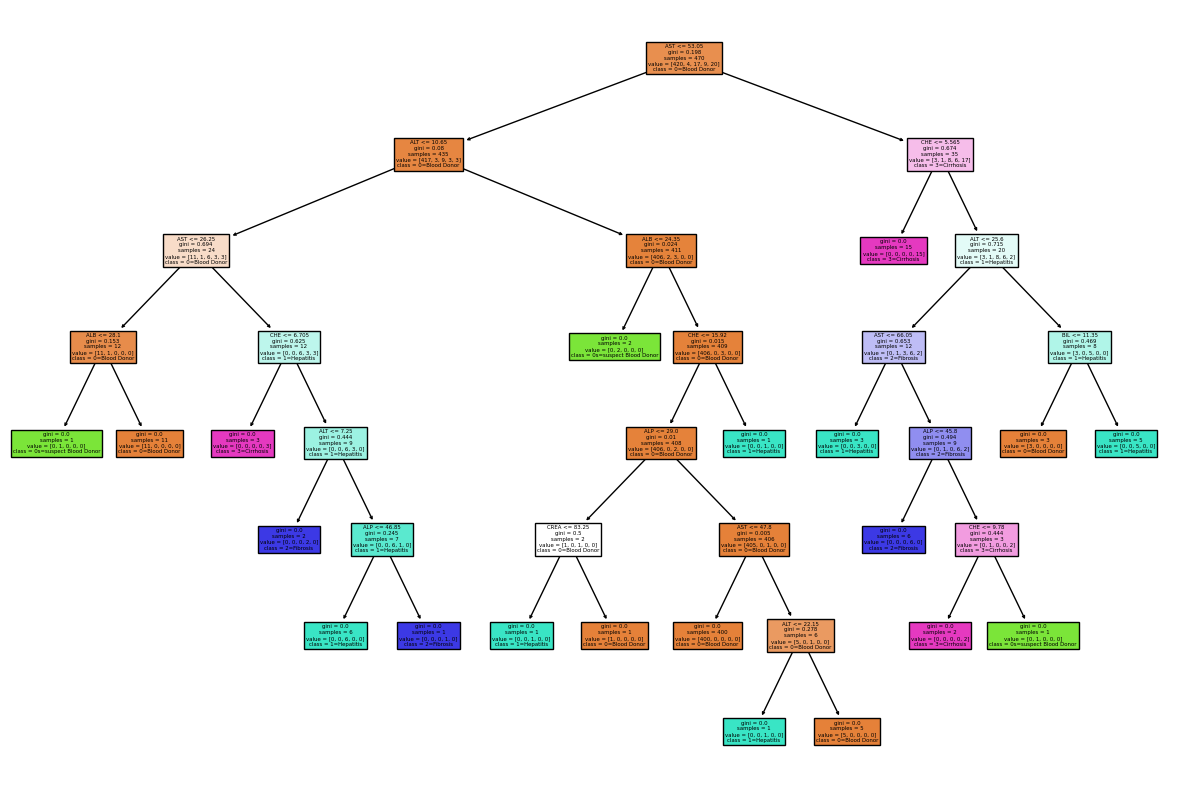

In [16]:
plt.figure(figsize=(15,10))
tree.plot_tree(DT, feature_names = X.columns, filled=True, class_names = Y.unique())
plt.show()

#### Mencoba melakukan prekdiksi menggunakan Desicion Tree

In [17]:
data = [[12.1, 106.0 , 38.5 , 7.5 , 7.7 , 22.1 , 69.0 , 52.5 , 3.23 , 6.93]]
test_prediksi = [[23.3, 77.0 , 58.5 , 8.5 , 5.7 , 21.3 , 70 , 42.6 , 3.21 , 7.55]]
DT.predict(test_prediksi)

C:\Users\ASUS\AppData\Roaming\Python\Python310\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array(['0=Blood Donor'], dtype=object)

## 3. Algoritma Naive Bayes

In [18]:
# Import Library yang akan digunakan dalam algoritma Naive Bayes
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

In [19]:
GNB = GaussianNB().fit(X_train, Y_train)

In [20]:
GNBpredict = GNB.predict(X_test)

#### Akurasi Dari Gaussian Naive Bayes

In [21]:
print("Akurasi dari Gaussian Naive Bayes :")
accuracy_score(GNBpredict, Y_test)

Akurasi dari Gaussian Naive Bayes :


0.923728813559322

## 4. Algoritma Support Vector Machine (SVM)

In [ ]:
from sklearn.svm import SVC

In [ ]:
SVC = SVC().fit(X_train, Y_train)
SVC_predict = SVC.predict(X_test)

In [ ]:
print(f'Akurasi Training menggunakan SVM : {SVC.score(X_train, Y_train)}')
print(f'Akurasi Test menggunakan SVM : {SVC.score(X_test, Y_test)}')

Akurasi Training menggunakan SVM : 0.9531914893617022
Akurasi Test menggunakan SVM : 0.940677966101695


## Perbandingan SCORE dari berbagai Algoritma

In [32]:
print("------------------------ K N N ------------------------------------")
print(f'Akurasi Training menggunakan KNN : {modelKNN.score(X_train, Y_train)}')
print(f'Akurasi Test menggunakan KNN : {modelKNN.score(X_test, Y_test)}')
print("\n")
print("---------------------- Decision Tree -------------------------------")
print(f'Akurasi Training menggunakan Decision Tree : {DT.score(X_train, Y_train)}')
print(f'Akurasi Test menggunakan Decision Tree : {DT.score(X_test, Y_test)}')
print("\n")
print("----------------------  Naive Bayes -------------------------------")
print("Akurasi dari Gaussian Naive Bayes :"), accuracy_score(GNBpredict, Y_test)

print("\n")
print("--------------------------- SVM ------------------------------------")
print(f'Akurasi Training menggunakan SVM : {SVC.score(X_train, Y_train)}')
print(f'Akurasi Test menggunakan SVM : {SVC.score(X_test, Y_test)}')


------------------------ K N N ------------------------------------
Akurasi Training menggunakan KNN : 0.9468085106382979
Akurasi Test menggunakan KNN : 0.9152542372881356


---------------------- Decision Tree -------------------------------
Akurasi Training menggunakan Decision Tree : 1.0
Akurasi Test menggunakan Decision Tree : 0.9067796610169492


----------------------  Naive Bayes -------------------------------
Akurasi dari Gaussian Naive Bayes :


--------------------------- SVM ------------------------------------
Akurasi Training menggunakan SVM : 0.9531914893617022
Akurasi Test menggunakan SVM : 0.940677966101695


#### Sehingga Dapat disimpulkan Bahwa algoritma paling efektif adalah Algoritma Decision Tree

## Tampilkan score dari model-model tersebut untuk classification

In [39]:
from sklearn.metrics import classification_report

In [40]:
print("=================================================================")
print("\t \t      Classification Report")
print("================================================================")
print("\t \t     | K- Nearest Neighbor |")
print(classification_report (Y_test, CM_predict))
print("\n")

print("\t \t     | Decition Tree |")
print(classification_report (Y_test, CM_predict2))
print("\n")

print("\t \t     | Naive Bayes |")
print(classification_report (Y_test, CM_predict3))

	 	      Classification Report
	 	     | K- Nearest Neighbor |
                        precision    recall  f1-score   support

         0=Blood Donor       0.95      1.00      0.98       106
0s=suspect Blood Donor       0.00      0.00      0.00         3
           1=Hepatitis       0.20      0.33      0.25         3
            2=Fibrosis       0.00      0.00      0.00         3
           3=Cirrhosis       1.00      0.33      0.50         3

              accuracy                           0.92       118
             macro avg       0.43      0.33      0.35       118
          weighted avg       0.89      0.92      0.90       118



	 	     | Decition Tree |
                        precision    recall  f1-score   support

         0=Blood Donor       0.97      0.98      0.98       106
0s=suspect Blood Donor       0.00      0.00      0.00         3
           1=Hepatitis       0.20      0.33      0.25         3
            2=Fibrosis       0.00      0.00      0.00         3
         

C:\Users\ASUS\AppData\Roaming\Python\Python310\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ASUS\AppData\Roaming\Python\Python310\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ASUS\AppData\Roaming\Python\Python310\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C